<a href="https://colab.research.google.com/github/thanhnhan311201/CS114.L11.KHCL/blob/master/ImageClassificationV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
train_path = '/content/drive/MyDrive/HandWritenDataset/train'
validation_path = '/content/drive/MyDrive/HandWritenDataset/validation'

In [3]:
from skimage.feature import hog
from skimage.io import imread, imshow
from skimage.transform import rescale
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import cv2 
import os
from PIL import Image
import skimage

In [4]:
FJoin = os.path.join

# Lấy link ảnh và labels cho tập train và validation

In [5]:
link_train = []
link_val = []
label_train = []
label_val = []

In [6]:
list_folder_train = sorted([FJoin(train_path, f) for f in os.listdir(train_path)])
list_folder_val = sorted([FJoin(validation_path, f) for f in os.listdir(validation_path)])

In [7]:
def getClass(a_path):
    without_extra_slash = os.path.normpath(a_path)
    last_part = os.path.basename(without_extra_slash)

    return last_part

In [8]:
def getImageLink_label(list_folder):
    list_link = []
    list_label = []
    index = 0
    for folder in list_folder:
        img_link = [FJoin(folder, f) for f in os.listdir(folder)]
        for link in img_link:
            list_link.append(link)
            list_label.append(index)
        index += 1
    return list_link, list_label

In [9]:
link_train, label_train = getImageLink_label(list_folder_train)
link_val, label_val = getImageLink_label(list_folder_val)

In [10]:
print(link_train)

['/content/drive/MyDrive/HandWritenDataset/train/a/7107.jpg', '/content/drive/MyDrive/HandWritenDataset/train/a/4805.jpg', '/content/drive/MyDrive/HandWritenDataset/train/a/4807.jpg', '/content/drive/MyDrive/HandWritenDataset/train/a/14461.jpg', '/content/drive/MyDrive/HandWritenDataset/train/a/11242.jpg', '/content/drive/MyDrive/HandWritenDataset/train/a/3881.jpg', '/content/drive/MyDrive/HandWritenDataset/train/a/7564.jpg', '/content/drive/MyDrive/HandWritenDataset/train/a/6640.jpg', '/content/drive/MyDrive/HandWritenDataset/train/a/9401.jpg', '/content/drive/MyDrive/HandWritenDataset/train/a/8022.jpg', '/content/drive/MyDrive/HandWritenDataset/train/a/6180.jpg', '/content/drive/MyDrive/HandWritenDataset/train/a/14468.jpg', '/content/drive/MyDrive/HandWritenDataset/train/a/9409.jpg', '/content/drive/MyDrive/HandWritenDataset/train/a/7105.jpg', '/content/drive/MyDrive/HandWritenDataset/train/a/9861.jpg', '/content/drive/MyDrive/HandWritenDataset/train/a/8946.jpg', '/content/drive/MyDr

In [11]:
print(label_train)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

# Preprocessing

- grayScale 

(7473,)
(2491,)


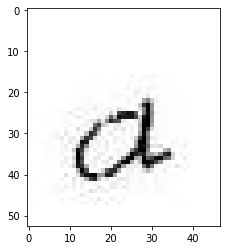

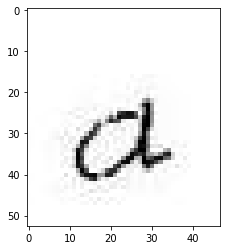

In [12]:
img = cv2.imread('/content/drive/MyDrive/HandWritenDataset/train/a/10320.jpg')
img_gray = skimage.color.rgb2gray(img)
plt.imshow(img, cmap= 'gray')
plt.figure()
plt.imshow(img_gray, cmap= 'gray')
print(img.flatten().shape)
print(img_gray.flatten().shape)

In [13]:
def getfeatureGrayScale(list_link_img):
    ans = []
    for x in list_link_img:
        img = cv2.imread(x)
        img_gray = skimage.color.rgb2gray(img)
        ans.append(img_gray.flatten())
    return np.array(ans)

In [ ]:
X_train_gray = getfeatureGrayScale(link_train)
X_val_gray = getfeatureGrayScale(link_val)
print(X_train_gray.shape)

In [ ]:
Y_train = np.array(label_train)
Y_val = np.array(label_val)

In [ ]:
print(Y_train)

# Thử các model khác nhau để tìm ra model có độ chính xác cao nhất.


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
from sklearn.svm import LinearSVC
model_gray = LinearSVC()
model_gray.fit(X_train_gray, Y_train)
y_pred = model_gray.predict(X_val_gray)
print('Percentage correct: ', accuracy_score(y_pred = y_pred, y_true = Y_val))

In [ ]:
print(classification_report(model_gray.predict(X_val_gray), Y_val))

In [ ]:
from sklearn.svm import SVC
model1_gray = SVC(max_iter= 1000)

model1_gray.fit(X_train_gray, Y_train)
y_pred = model1_gray.predict(X_val_gray)
print('Percentage correct: ', accuracy_score(y_pred = y_pred, y_true = Y_val))


In [ ]:
print(classification_report(model1_gray.predict(X_val_gray), Y_val))

In [ ]:
from sklearn.linear_model import SGDClassifier
model2_gray = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
model2_gray.fit(X_train_gray, Y_train)
y_pred = model2_gray.predict(X_val_gray)
print('Percentage correct: ', accuracy_score(y_pred = y_pred, y_true = Y_val))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model3_gray = DecisionTreeClassifier()
model3_gray.fit(X_train_gray, Y_train)
y_pred = model3_gray.predict(X_val_gray)
print('Percentage correct: ', accuracy_score(y_pred = y_pred, y_true = Y_val))

In [ ]:
from sklearn.naive_bayes import BernoulliNB
model4 = BernoulliNB()
model4.fit(X_train_gray, Y_train)


In [ ]:
y_pred = model4.predict(X_val_gray)
print('Percentage correct: ', accuracy_score(y_pred = y_pred, y_true = Y_val))

In [ ]:
print(y_pred)